# 《数据采集与清洗》
## 第一次作业内容： 网页抓取
### 具体目标：
+ 用``urllib.requests``库发起一次``get``请求，输出``response``文本信息；
+ 用``Requests``库伪装成火狐浏览器发起一次``post``请求，输出``response``文本信息；
+ 用``Requests``库中的``session``对象发出``get``请求，设置``cookies``并获取，输出获取的``cookies``内容；
+ 实现抓取网页的不去重深度遍历算法，自选合适的种子网站和相关参数，输出结果；
+ 编写抓取网页的广度遍历算法（含去重和不去重），自选合适的种子网站和相关参数，输出结果；
+ (选)将抓取网页的去重深度遍历算法封装成对象（类），并测试。

### 注：
+ 代码要有注释，结果要有分析；
+ 本次作业提交截至时间：2020年3月10日(星期二)；
+ 文件命名规则: 班级号+学号+姓名，示例：``1_20188989899_张三``；
+ 提交方式：1班发送至邮箱：632994085@qq.com；2班发送至邮箱：786888939@qq.com.

### 问题1：用``urllib.requests``库发起一次``get``请求，输出``response``文本信息。

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/>
<meta name="viewport" content="width=device-width, initial-scale=1.0,user-scalable=no"/>

<meta name="SiteName" content="湖南省卫生健康委员会"/>
<meta name="SiteDomain" content="wjw.hunan.gov.cn"/>
<meta name="SiteIDCode" content="4300000048"/>

<meta name="others" content="页面生成时间 2020-03-09 19:14:37" />
<title>湖南省卫生健康委员会</title>
<meta name="baidu-site-verification" content="0WRba0wU5r" />
<meta name="360-site-verification" content="74123f0677dd96c1998dd395f0729e87" />
<meta name="sogou_site_verification" content="nNDCro3fPo"/>
<script src="/wjw/xhtml/js/wap.js"></script>
<link type="text/css" rel="stylesheet" href="/wjw/xhtml/css/index.css" />
<link rel="stylesheet" href="/wjw/xhtml/css/wap.cs
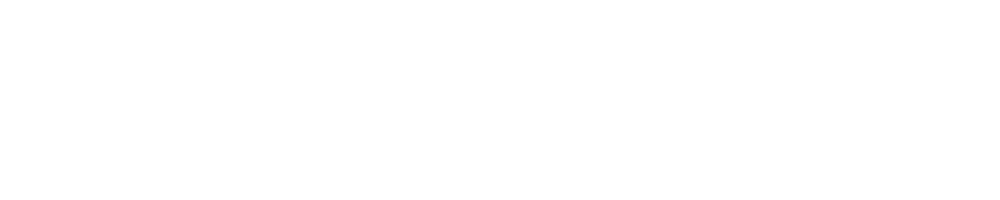
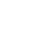

In [5]:
import urllib.request
response = urllib.request.urlopen("http://wjw.hunan.gov.cn/")
print(response.read().decode('utf-8'))


对湖南省卫健委网址发出请求，返回网址的源代码等信息

### 用``Requests``库伪装成火狐浏览器发起一次``post``请求，输出``response``文本信息。

In [6]:
import requests
url = 'http://httpbin.org/post'
headers = {
'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:73.0) Gecko/20100101 Firefox/73.0',
}
tuples = [('key1', 'value1'), ('key1', 'value2')]
r1 = requests.post('http://httpbin.org/post', headers=headers,data=tuples)
print(r1.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "key1": [
      "value1", 
      "value2"
    ]
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "23", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:73.0) Gecko/20100101 Firefox/73.0", 
    "X-Amzn-Trace-Id": "Root=1-5e663411-48bf1e256f329d9cda95818c"
  }, 
  "json": null, 
  "origin": "223.144.194.150", 
  "url": "http://httpbin.org/post"
}



通过对用requests库伪装成火狐浏览器发出post请求，返回输入的表格数据，并且可以看到user-agent中不再是python而是伪装成的浏览器数据

### 用``Requests``库中的``session``对象发出``get``请求，设置``cookies``并获取，输出获取的``cookies``内容。 

In [8]:
import requests
s = requests.Session()
s.get('http://httpbin.org/cookies/set/number/123123456456')
r = s.get('http://httpbin.org/cookies')
print(r.text)

{
  "cookies": {
    "number": "123123456456"
  }
}



发出get请求以后，返回cookies内容：123123456456

### 实现抓取网页的不去重深度遍历算法，自选合适的种子网站和相关参数，输出结果。


In [9]:
import re # 导入正则表达式包
import urllib.request as ur # 导入urllib包
import urllib.request as ur
import re

In [10]:
#实现深度优先爬取
count = 0
r = re.compile(r'href=[\'"]?(/item[^\'" >]+)') # 抽取所需链接信息的正则语言规则
seed = "/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/1450" # 这是百度百科词条
stack = [seed] # 设置种子链接的栈（使用列表模拟栈）
storage = {}
while count < 8:
    try:
        url = stack.pop(-1) # 取出栈的最后一条URL
        html = ur.urlopen("https://baike.baidu.com"+url).read().decode('utf-8') # 对URL进行拼接
        new_urls = r.findall(html) # 提取当前网页下的所有链接URL信息
        print(new_urls)
        stack.extend(new_urls) # 将新提取的链接信息入队列
        storage[url] = len(new_urls)
        count += 1
        print(count)
    except Exception as e:
        print(url)
        print(e) # 打印该网页中的所有链接


['/item/秒懂星课堂', '/item/秒懂大师说', '/item/秒懂看瓦特', '/item/秒懂五千年', '/item/秒懂全视界', '/item/%E7%99%BE%E5%BA%A6%E7%99%BE%E7%A7%91%EF%BC%9A%E5%A4%9A%E4%B9%89%E8%AF%8D', '/item/%E4%B9%89%E9%A1%B9', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84?force=1', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2683313#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/10721635#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2683297#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/19479322#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2683280#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/7442992#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/13880590#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2168489#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/19481818#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2683249#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/19486760#vie

深度遍历爬取数据结构百度百科词条并计数

### 编写抓取网页的广度遍历算法（含去重和不去重），自选合适的种子网站和相关参数，输出结果。 

In [11]:
#或者使用广度优先爬取
count = 0
r = re.compile(r'href=[\'"]?(/item[^\'" >]+)') # 抽取所需链接信息的正则语言规则
seed = "/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/1450" # 这是数据结构百度百科词条
queue = [seed] # 设置种子链接的队列（使用列表模拟队列）
storage = {}
while count < 8:
    try:
        url = queue.pop(0) # 取出队列最后一条URL
        html = ur.urlopen("https://baike.baidu.com"+url).read().decode('utf-8') # 对URL进行拼接
        new_urls = r.findall(html) # 提取当前网页下的所有链接URL信息
        print(new_urls)
        queue.extend(new_urls) # 将新提取的链接信息入队列
        storage[url] = len(new_urls)
        count += 1
    except Exception as e:
        print(url)
        print(e)

['/item/秒懂星课堂', '/item/秒懂大师说', '/item/秒懂看瓦特', '/item/秒懂五千年', '/item/秒懂全视界', '/item/%E7%99%BE%E5%BA%A6%E7%99%BE%E7%A7%91%EF%BC%9A%E5%A4%9A%E4%B9%89%E8%AF%8D', '/item/%E4%B9%89%E9%A1%B9', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84?force=1', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2683313#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/10721635#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2683297#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/19479322#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2683280#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/7442992#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/13880590#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2168489#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/19481818#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2683249#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/19486760#vie

['/item/秒懂星课堂', '/item/秒懂大师说', '/item/秒懂看瓦特', '/item/秒懂五千年', '/item/秒懂全视界', '/item/%E7%99%BE%E5%BA%A6%E7%99%BE%E7%A7%91%EF%BC%9A%E5%A4%9A%E4%B9%89%E8%AF%8D', '/item/%E4%B9%89%E9%A1%B9', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84?force=1', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/1450#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2683313#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2683297#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/19479322#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2683280#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/7442992#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/13880590#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2168489#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/19481818#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2683249#viewPageContent', '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/19486760#viewPag

In [4]:
#加层数控制的
count = 0 # 层数
floors = 1 # 限制爬取的层数
lastStep = []
r = re.compile(r'href=[\'"]?(/item[^\'" >]+)')
seed = '/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/1450' # 这是数据结构百度百科词条
queue = [[seed]]
for i in range(floors): # 限制爬取范围在设定的层数范围内
    queue.append([])
storage = {}
used = set() # 设置集合存放爬取过的url
while len(queue[0])>0 or count!=0: # 种子队列不为空或者层数不为零
    try:
        url = queue[count].pop(-1)
        print(url+" "+str(count)) # 打印当前链接和层数
        html = ur.urlopen('https://baike.baidu.com'+url).read().decode('utf-8')
        storage[url]=html
        used.add(url) # 将爬取过的URL放入集合中
        new_urls = r.findall(html)
        if count < floors:
            for new_url in set(new_urls):
                if new_url not in used and new_url not in queue:#判断新链接网址中的包含的链接是否为重复的
                    queue[count+1].append(new_url) # 将爬取的URL存入到队列中相应层数的列表
            count+=1
        else:
            if len(queue[count])==0:
                count -= 1
    except Exception as e:
        print(url)
        print(e)

/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/1450 0
/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/13880590#viewPageContent 1
/item/%E8%AE%A1%E7%AE%97%E6%9C%BA 1
/item/%E8%AE%A1%E7%AE%97%E6%9C%BA/140338 1
/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84?force=1 1
/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2683264#viewPageContent 1
/item/%E6%95%B0%E6%8D%AE%E5%85%83%E7%B4%A0 1
/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/2683249#viewPageContent 1
/item/%E6%A0%91/2699484 1
/item/%E4%B9%89%E9%A1%B9 1
/item/%E6%95%B0%E6%8D%AE/5947370 1
/item/%E9%80%BB%E8%BE%91%E7%BB%93%E6%9E%84 1
/item/%E9%80%BB%E8%BE%91%E7%BB%93%E6%9E%84/9663235 1
/item/%E7%AE%97%E6%B3%95/209025 1
/item/%E6%95%88%E7%8E%87/868847 1
/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/10721635#viewPageContent 1
/item/%E7%99%BE%E5%BA%A6%E7%99%BE%E7%A7%91%EF%BC%9A%E5%A4%9A%E4%B9%89%E8%AF%8D 1
/item/%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84/7442992#viewPageContent 1
/item/%E5%A0%86/20606834 1
/item/%E9%93%BE%E8%A1%A8/9794473 1
/item/%E9%80%BB%E8%BE%91%E5%8

前者不去重进行广度遍历数据结构百度百科词条，后者使用set()方法进行URL去重和层数控制在1层，并输出相应的URL和层数

### (选)将抓取网页的去重深度遍历算法封装成对象（类），并测试。 

In [7]:
# 测试

这里对结果进行分析。